/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


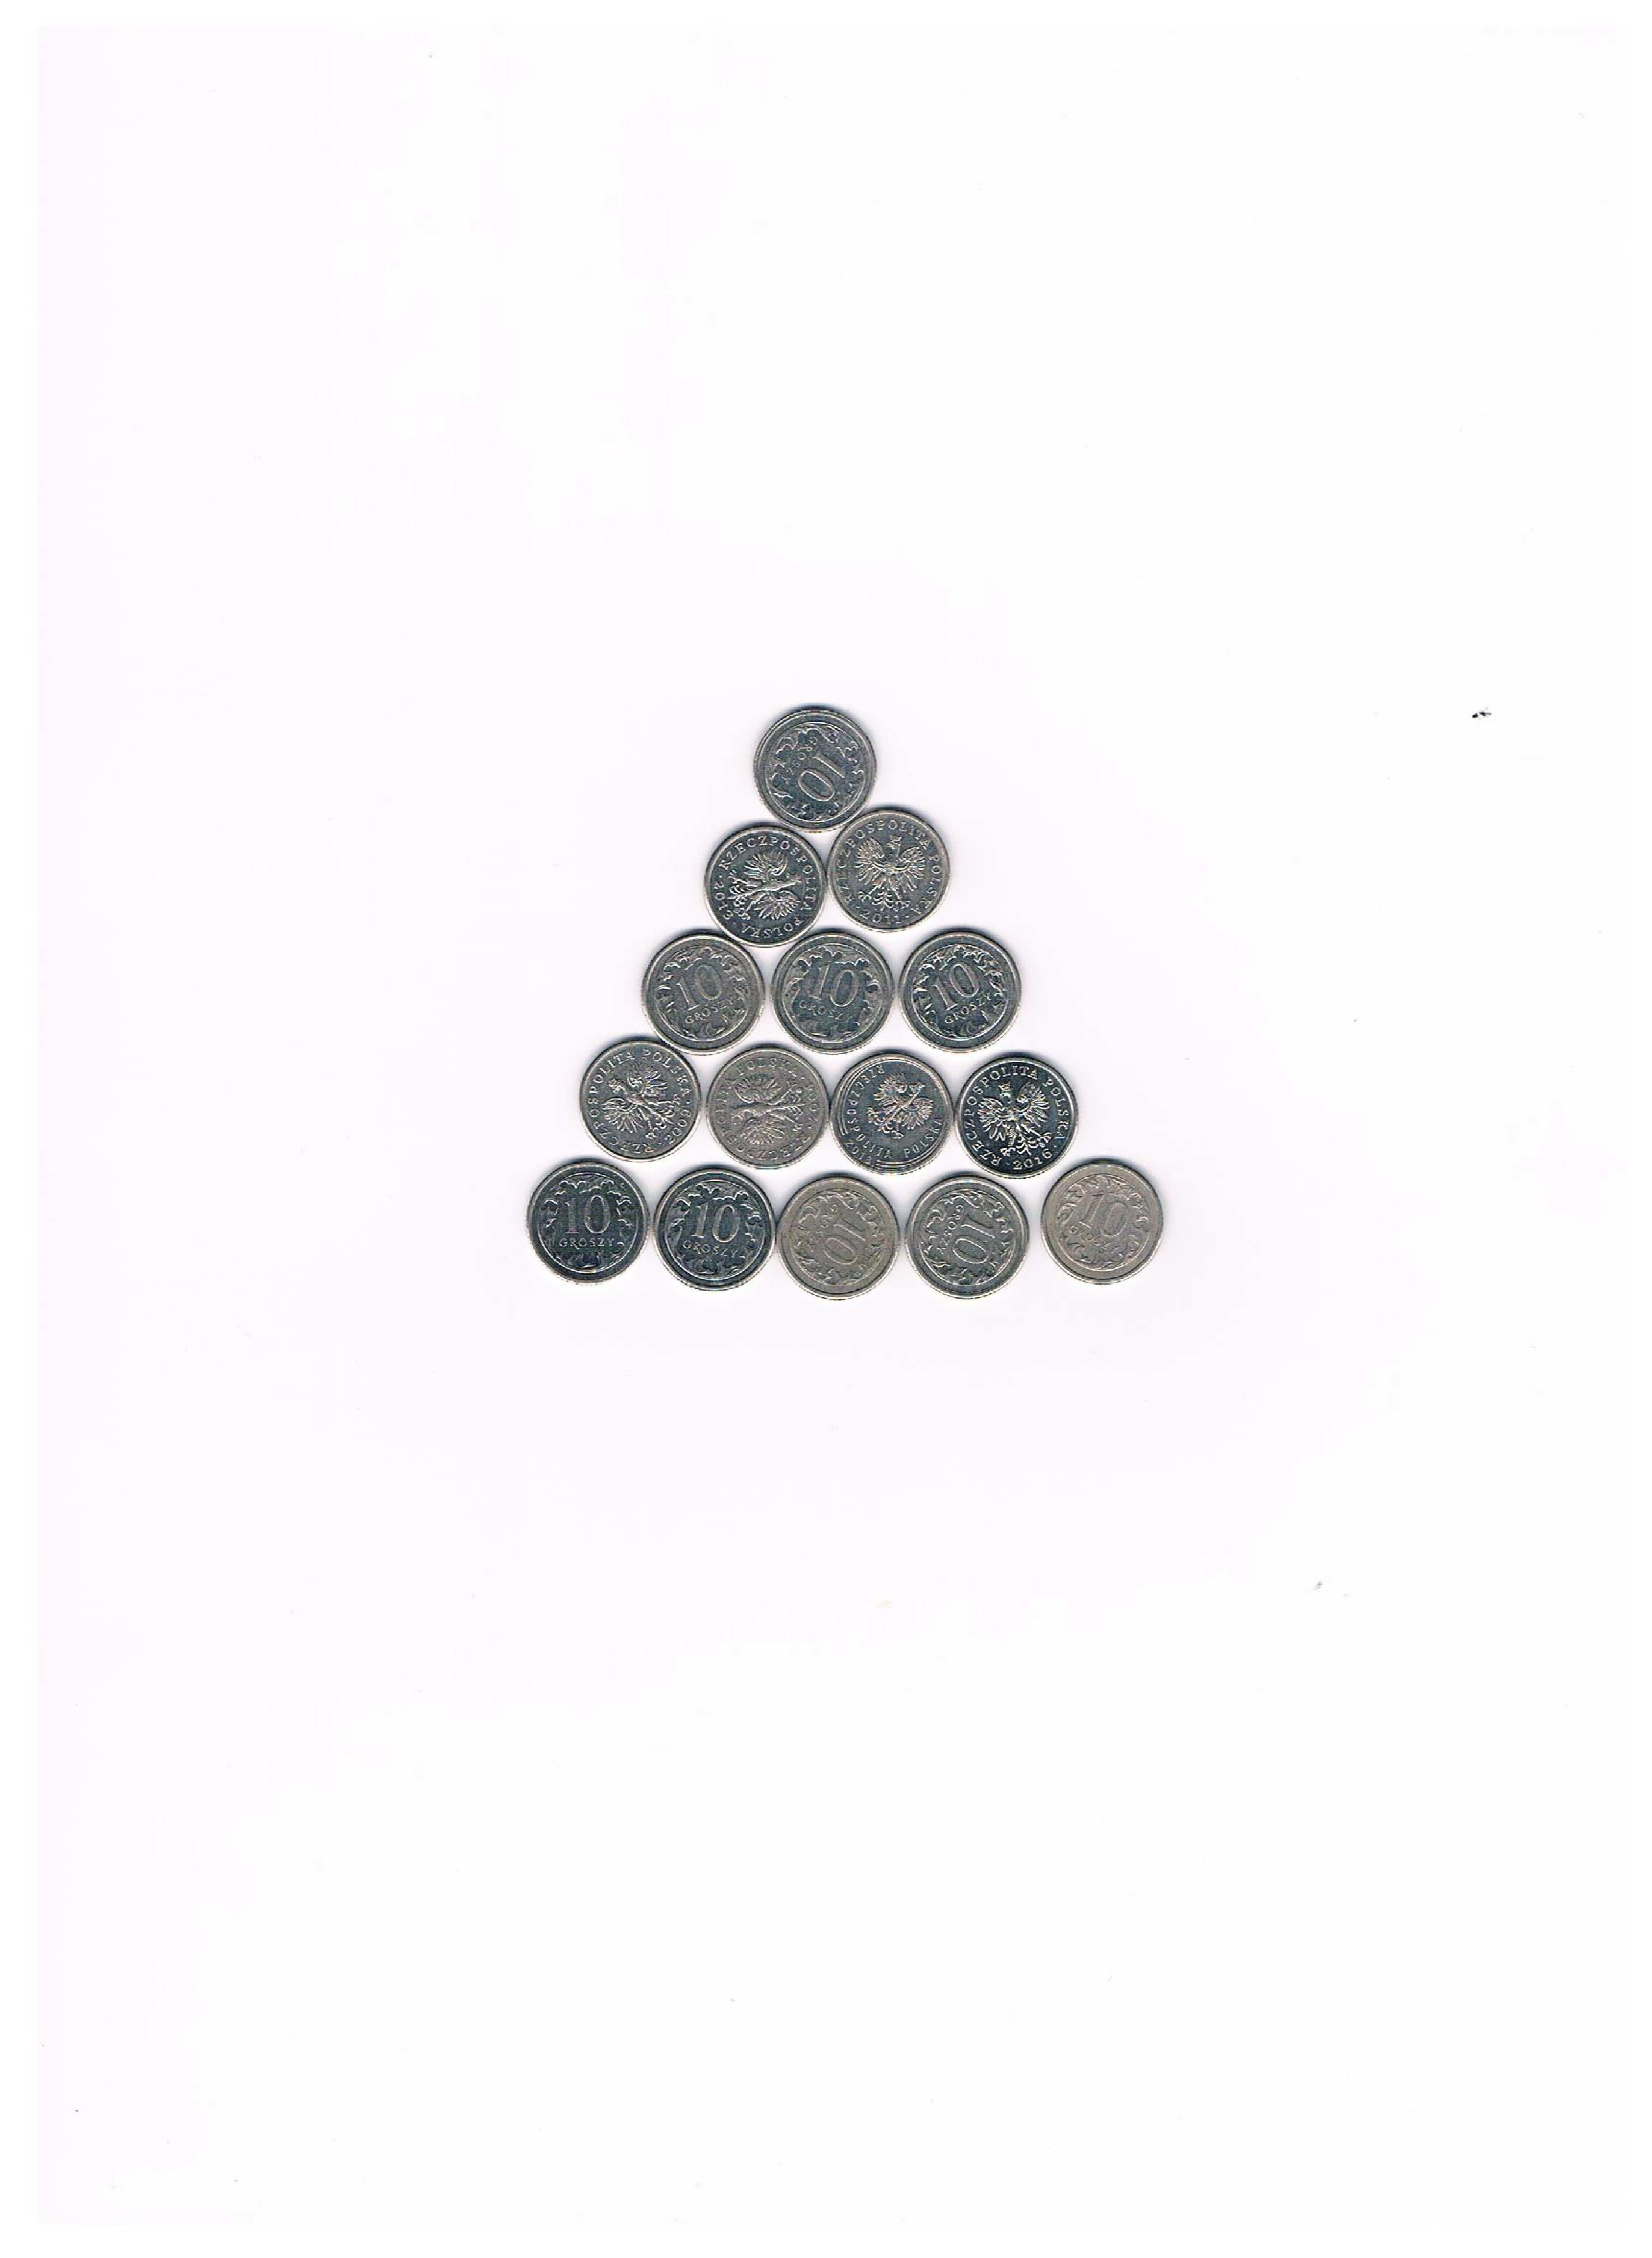

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray

def showImage(image):
    plt.figure(figsize=(100,100))
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.show()

path = 'images/'

image = io.imread(path + '003.jpg')
gray_image = rgb2gray(image)
byte_image = img_as_ubyte(gray_image)


showImage(image)
# showImage(gray_image)
# showImage(byte_image)


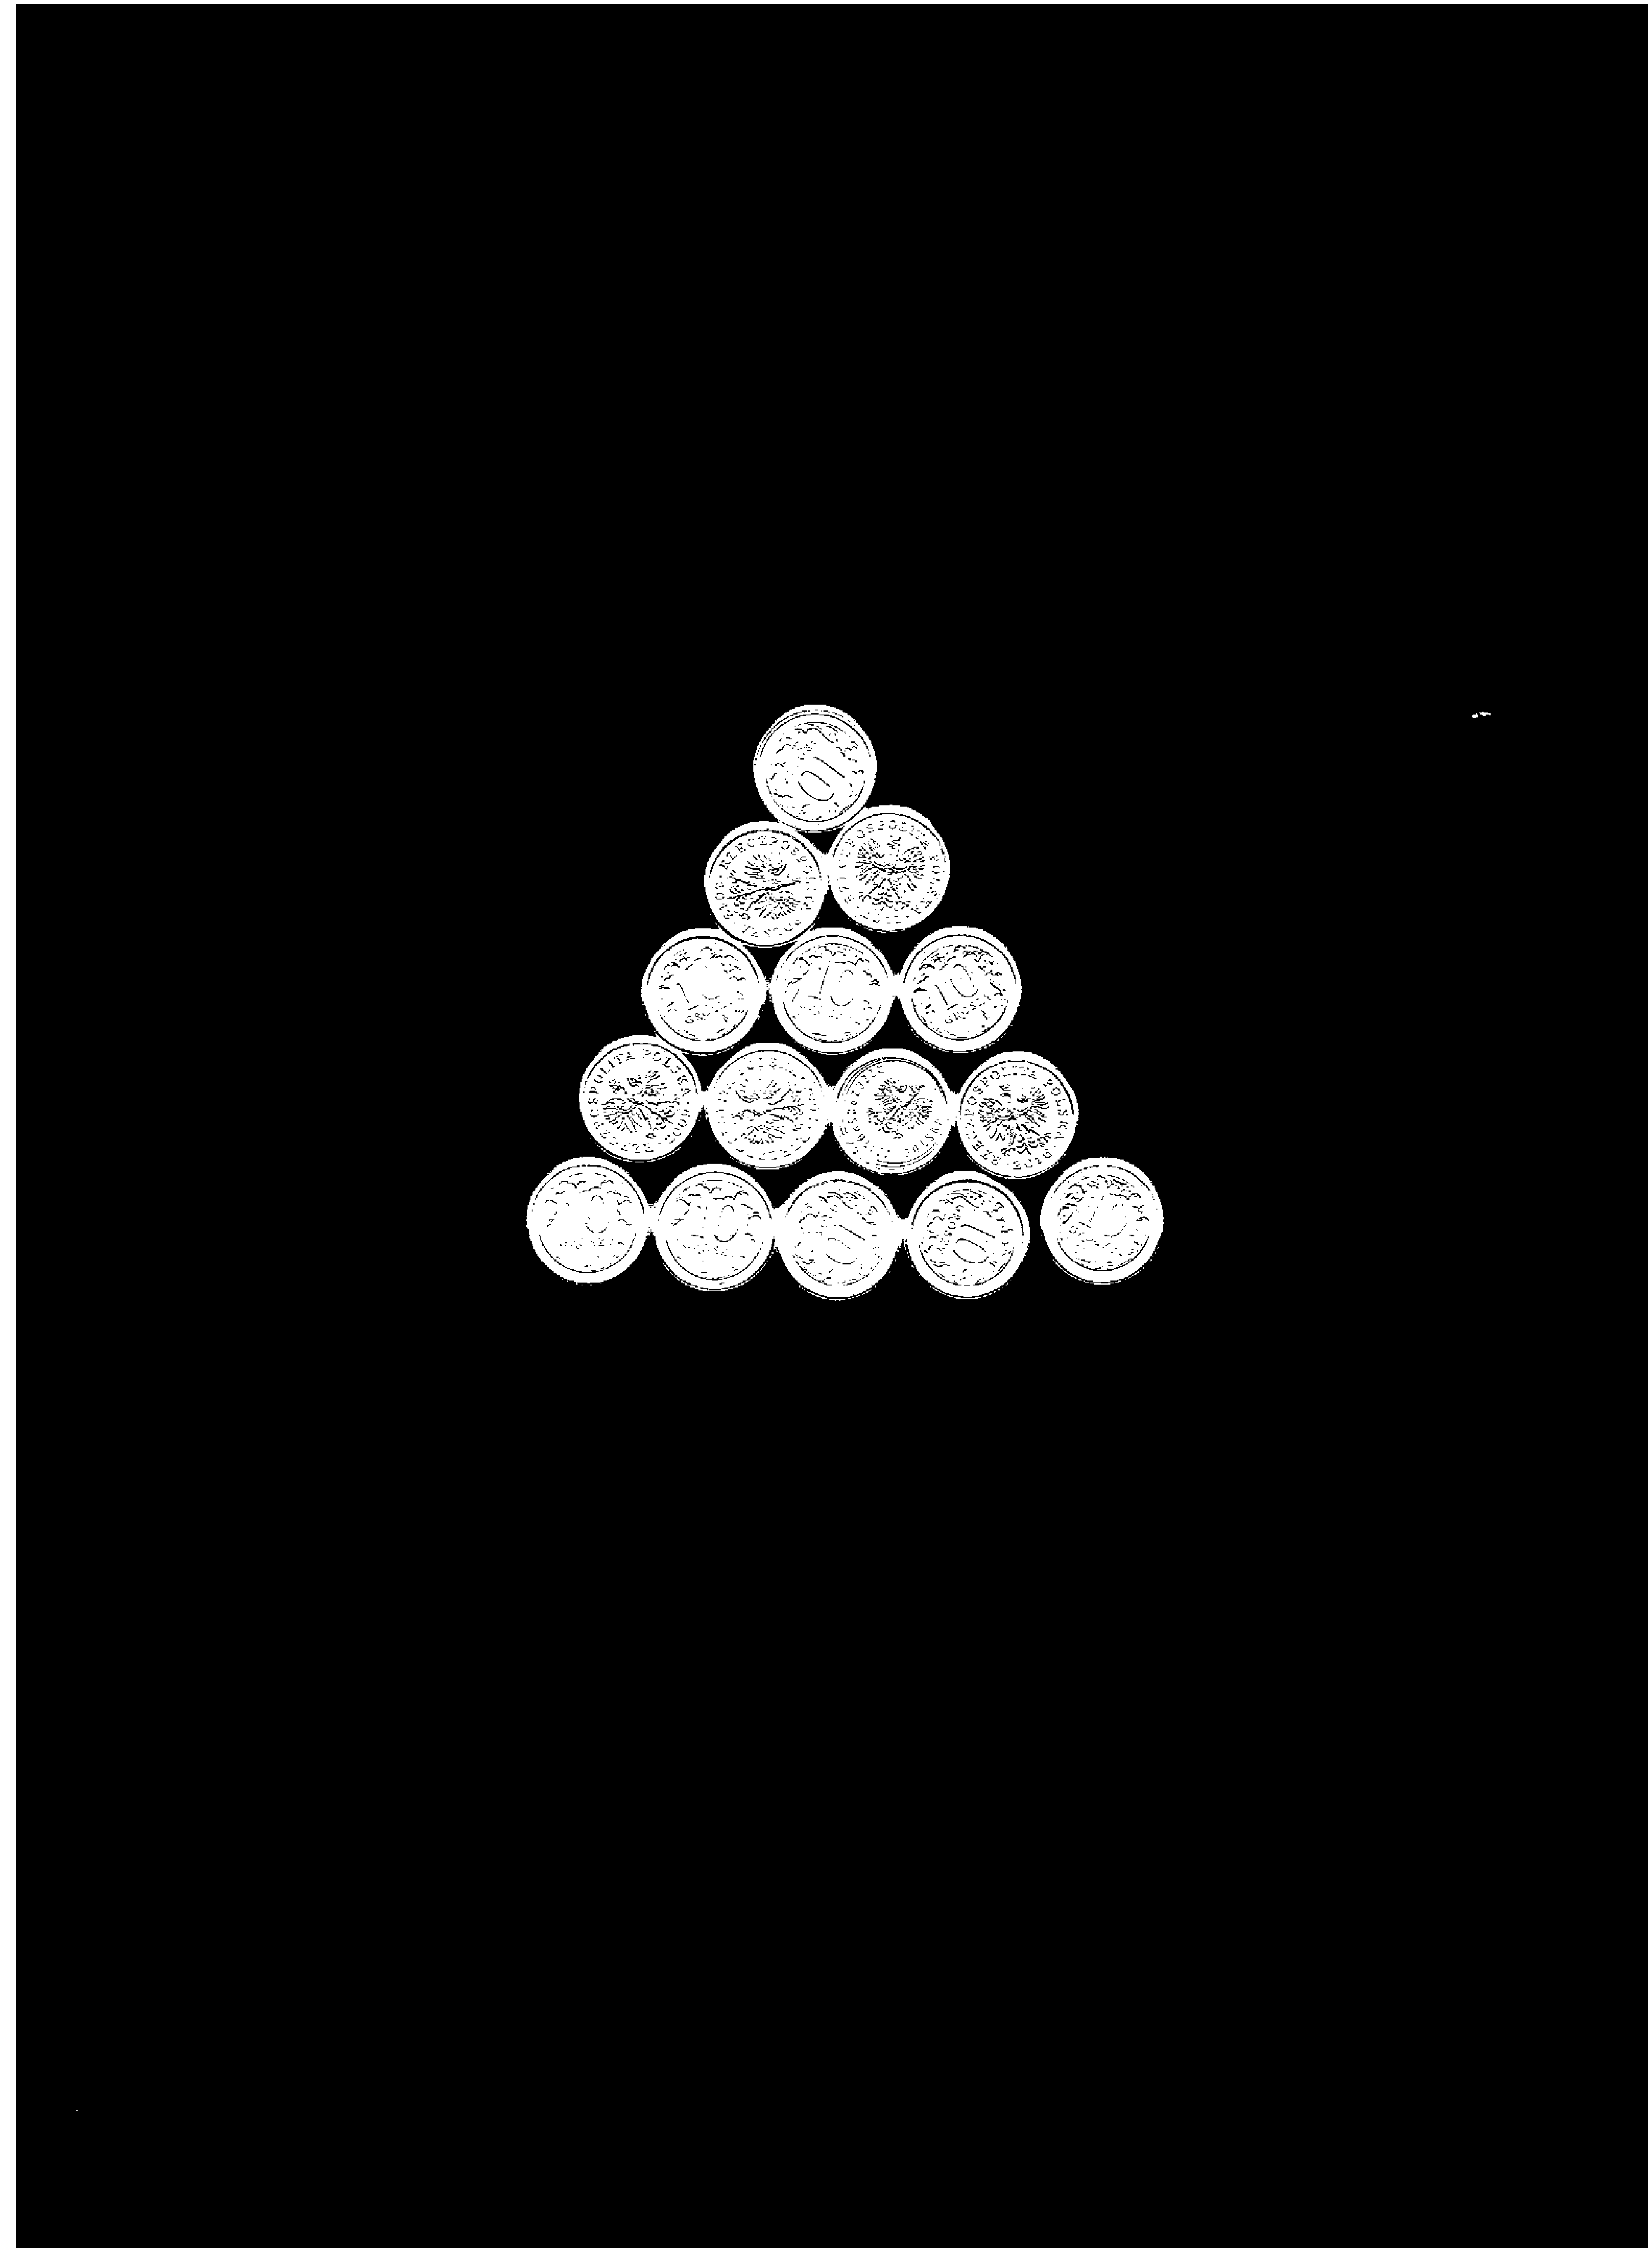

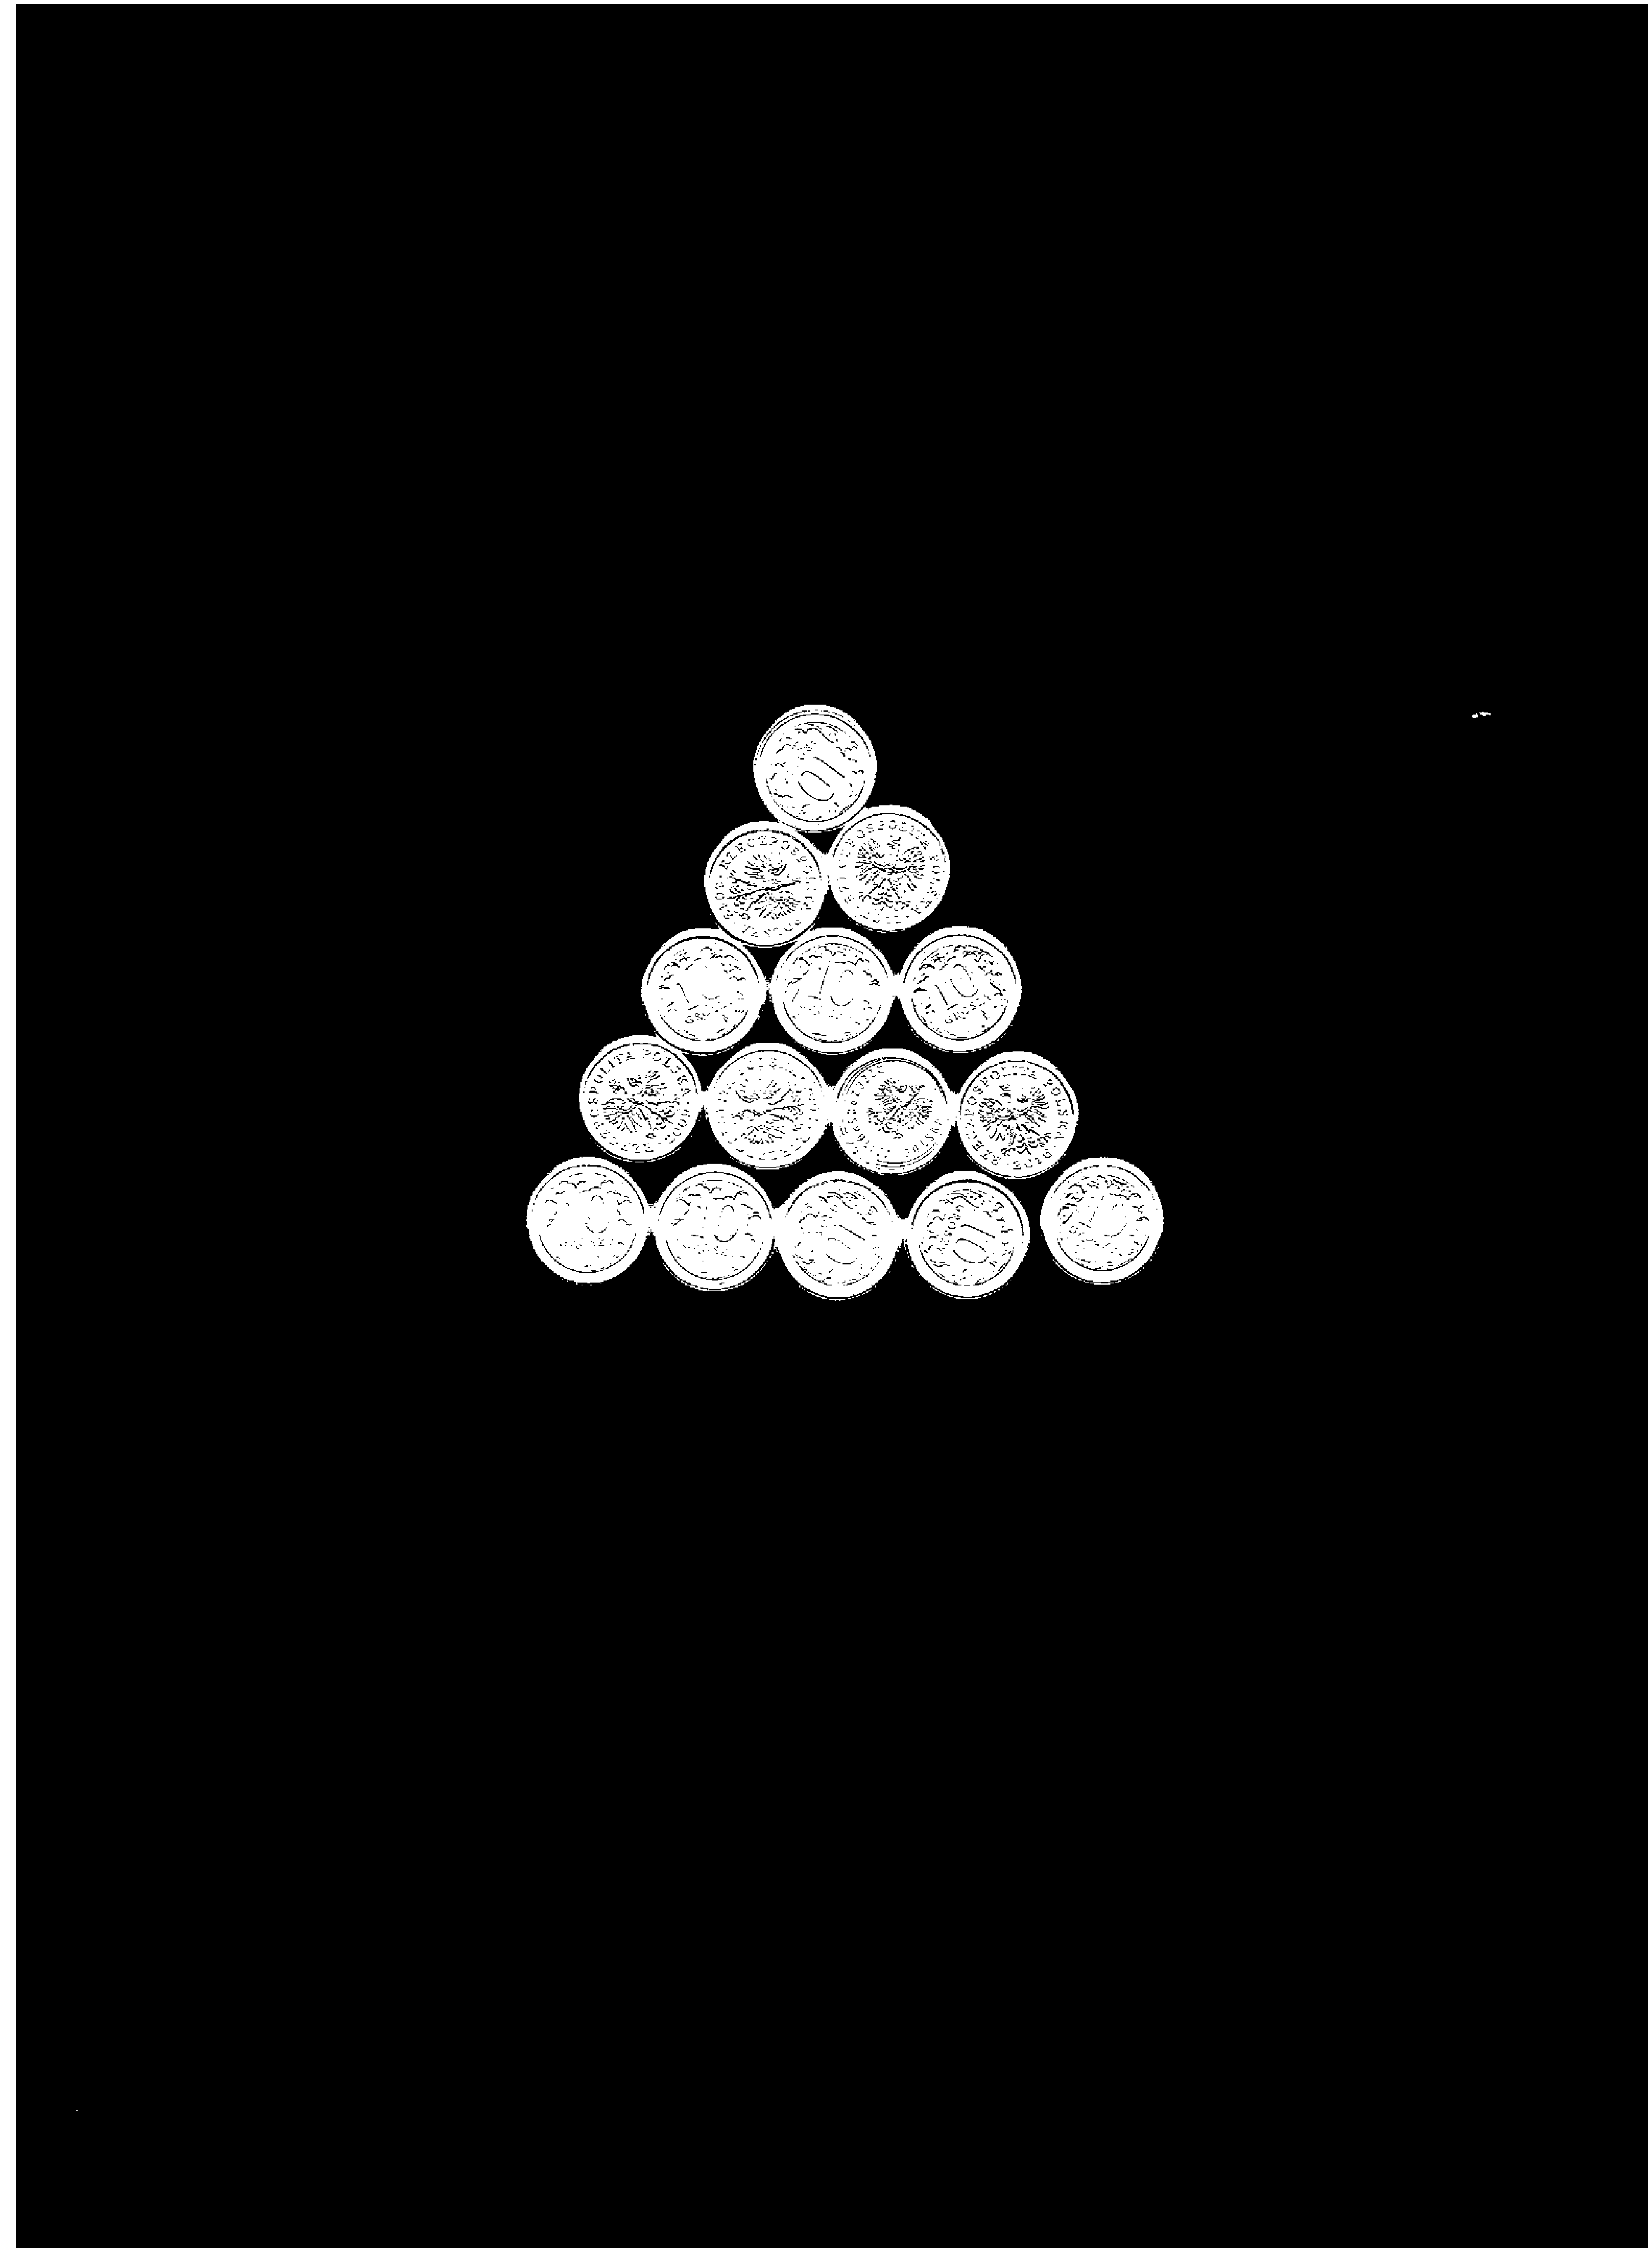

In [9]:
from skimage.filters import threshold_li
from skimage import data
import cv2



th, image_byte = cv2.threshold(byte_image, 170, 255, cv2.THRESH_BINARY_INV)
showImage(image_byte)

image_floodfill = image_byte.copy()
showImage(image_floodfill)


Selected a threshold of 167.00


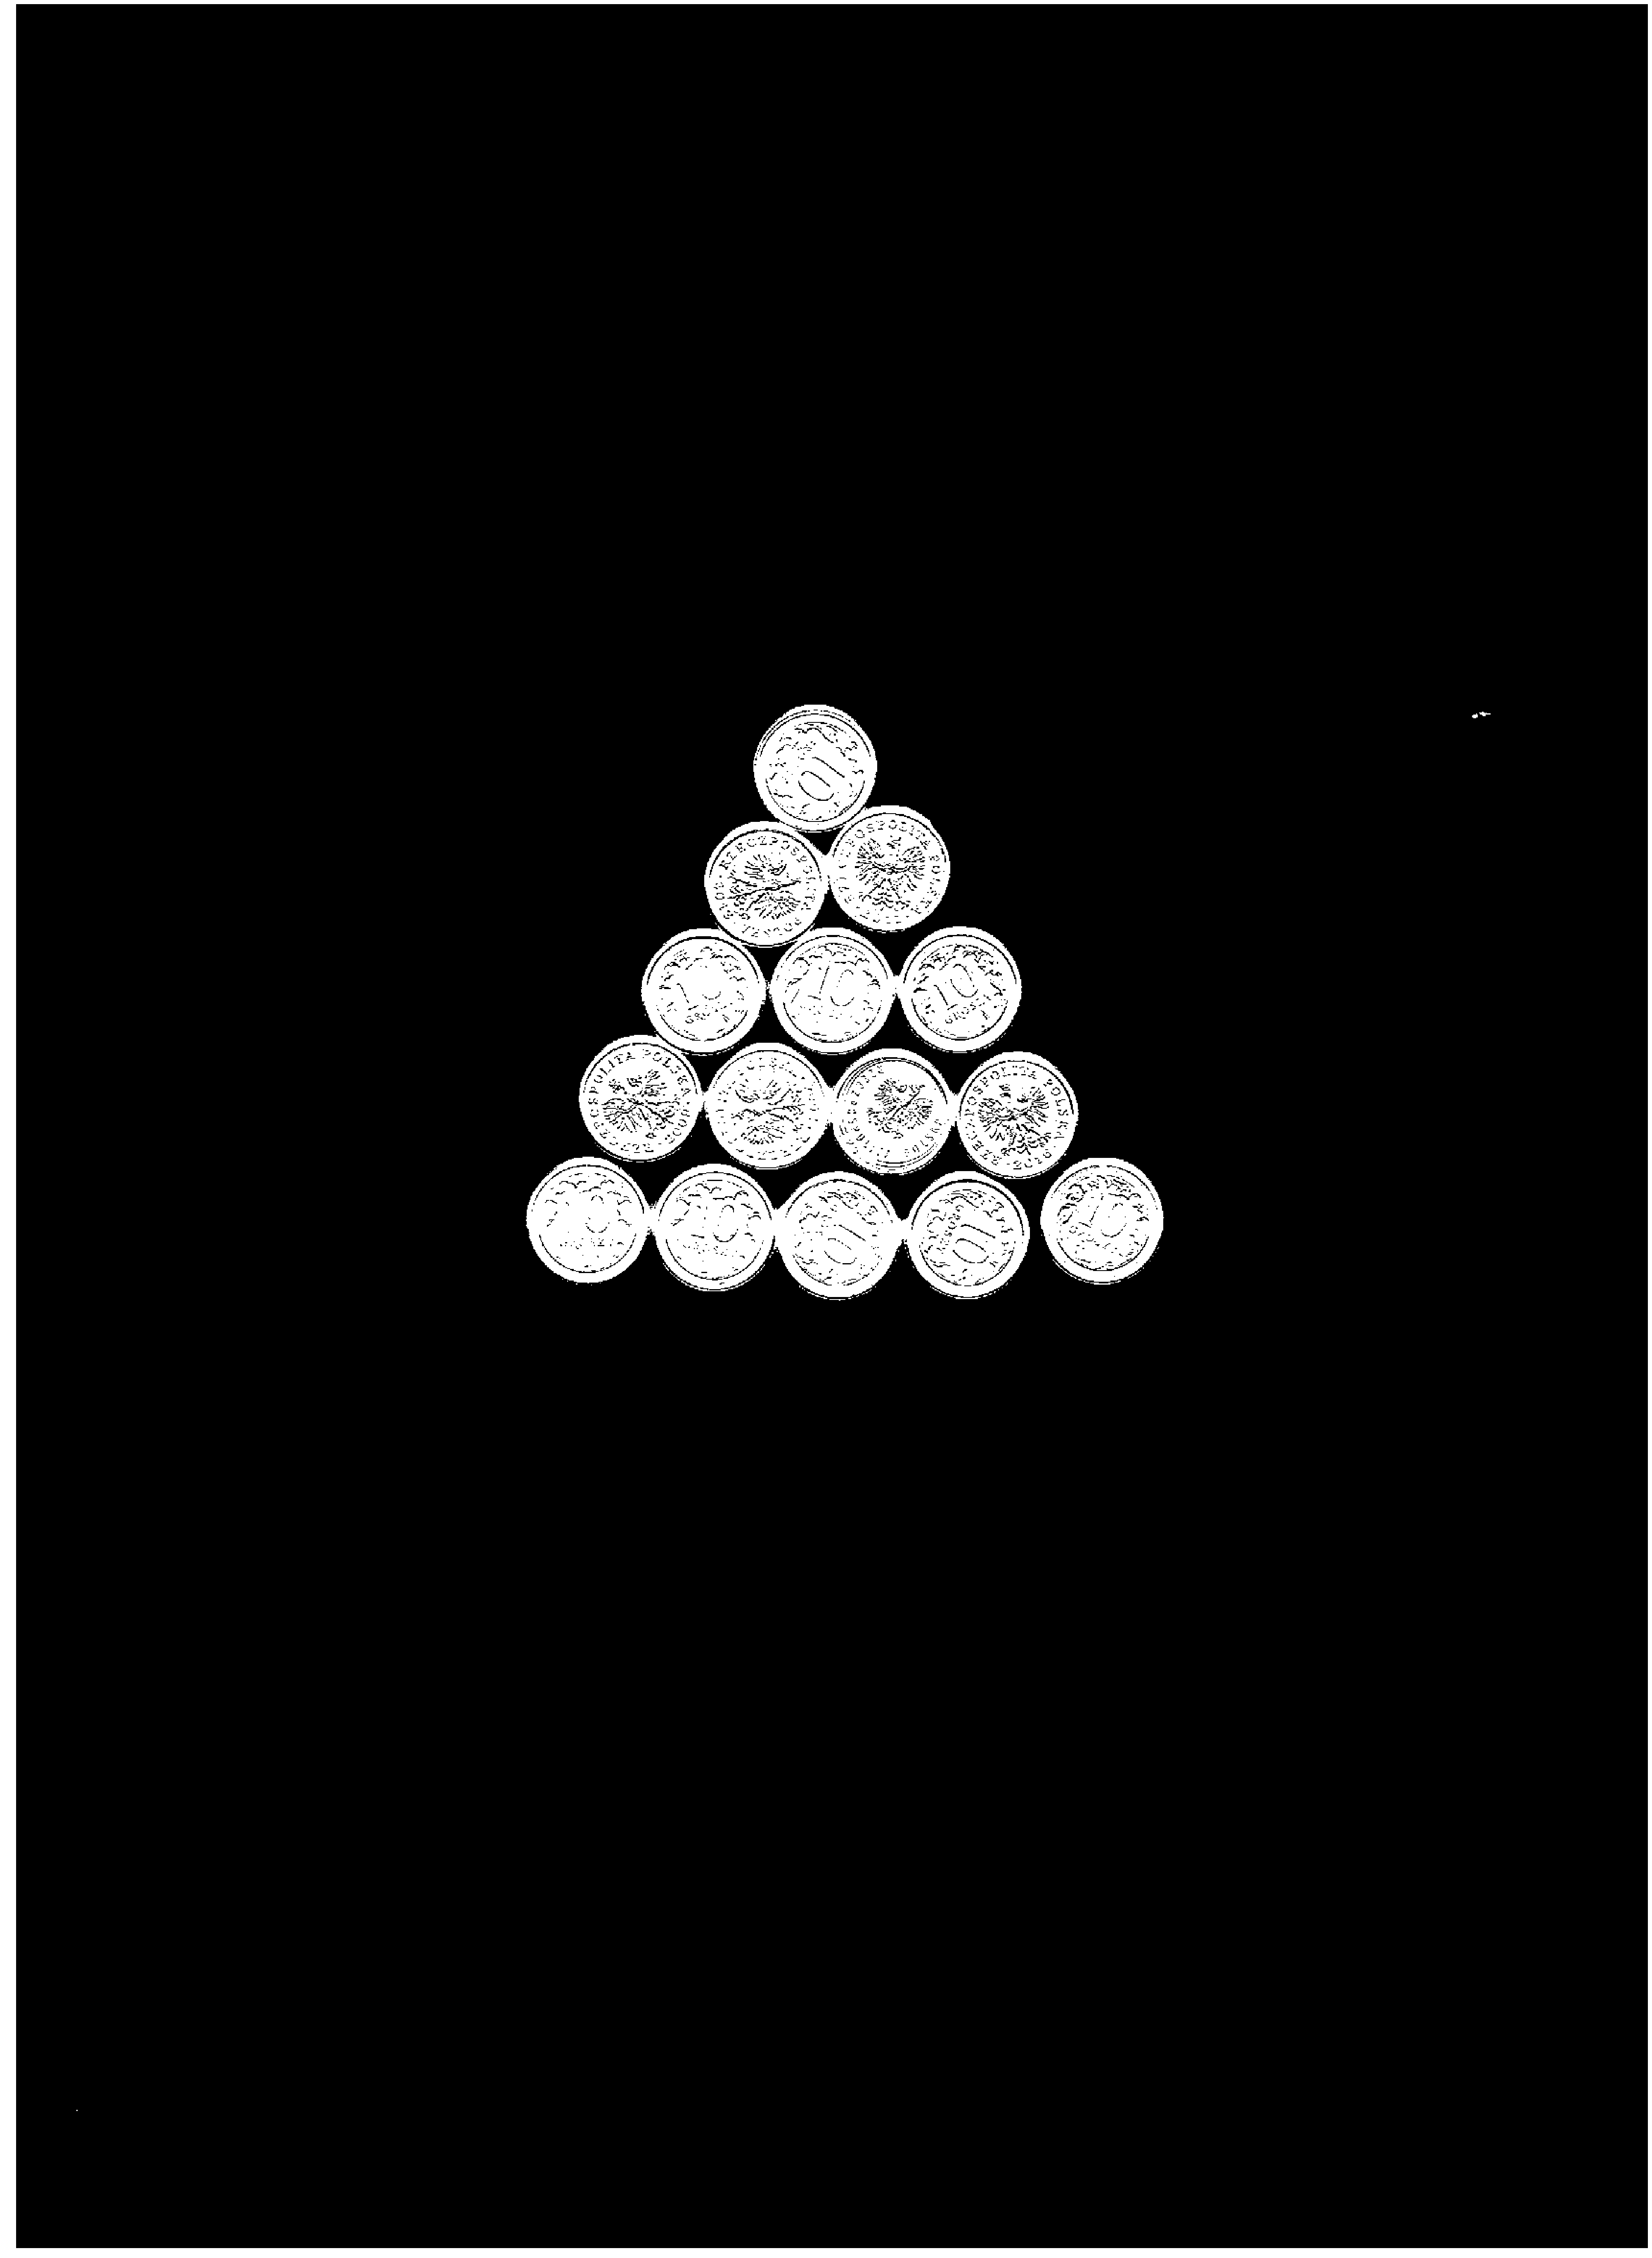

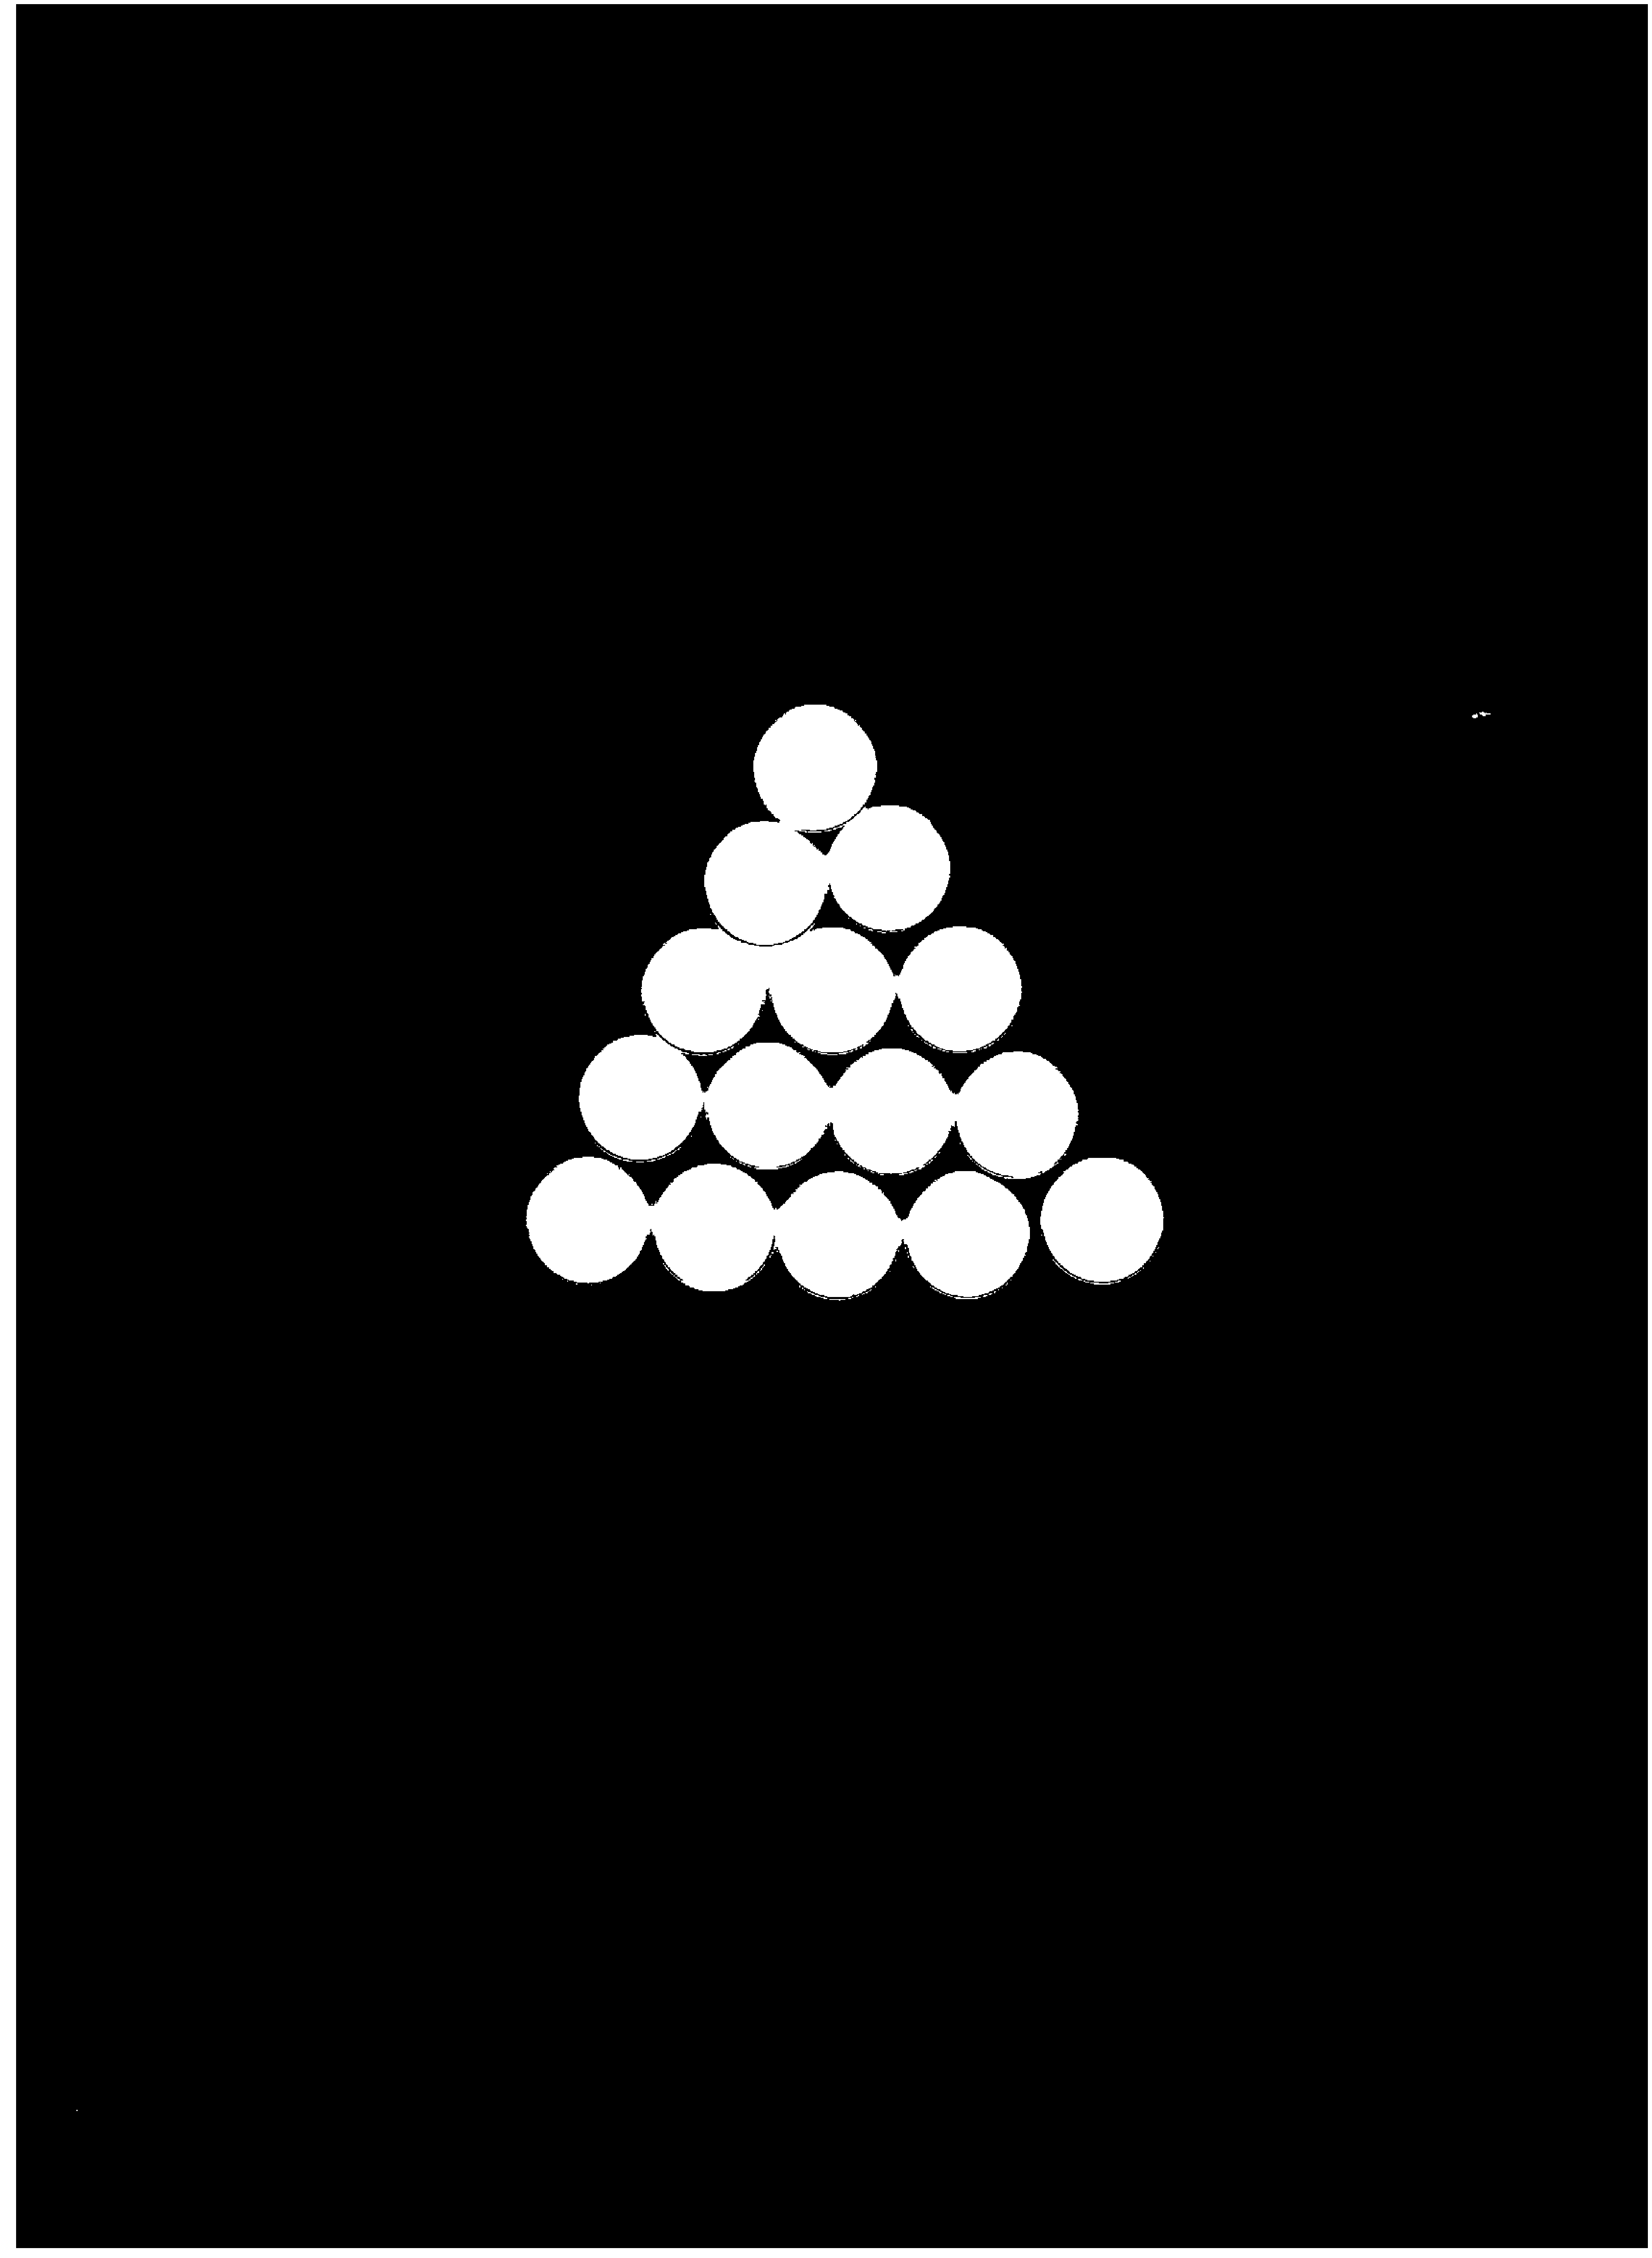

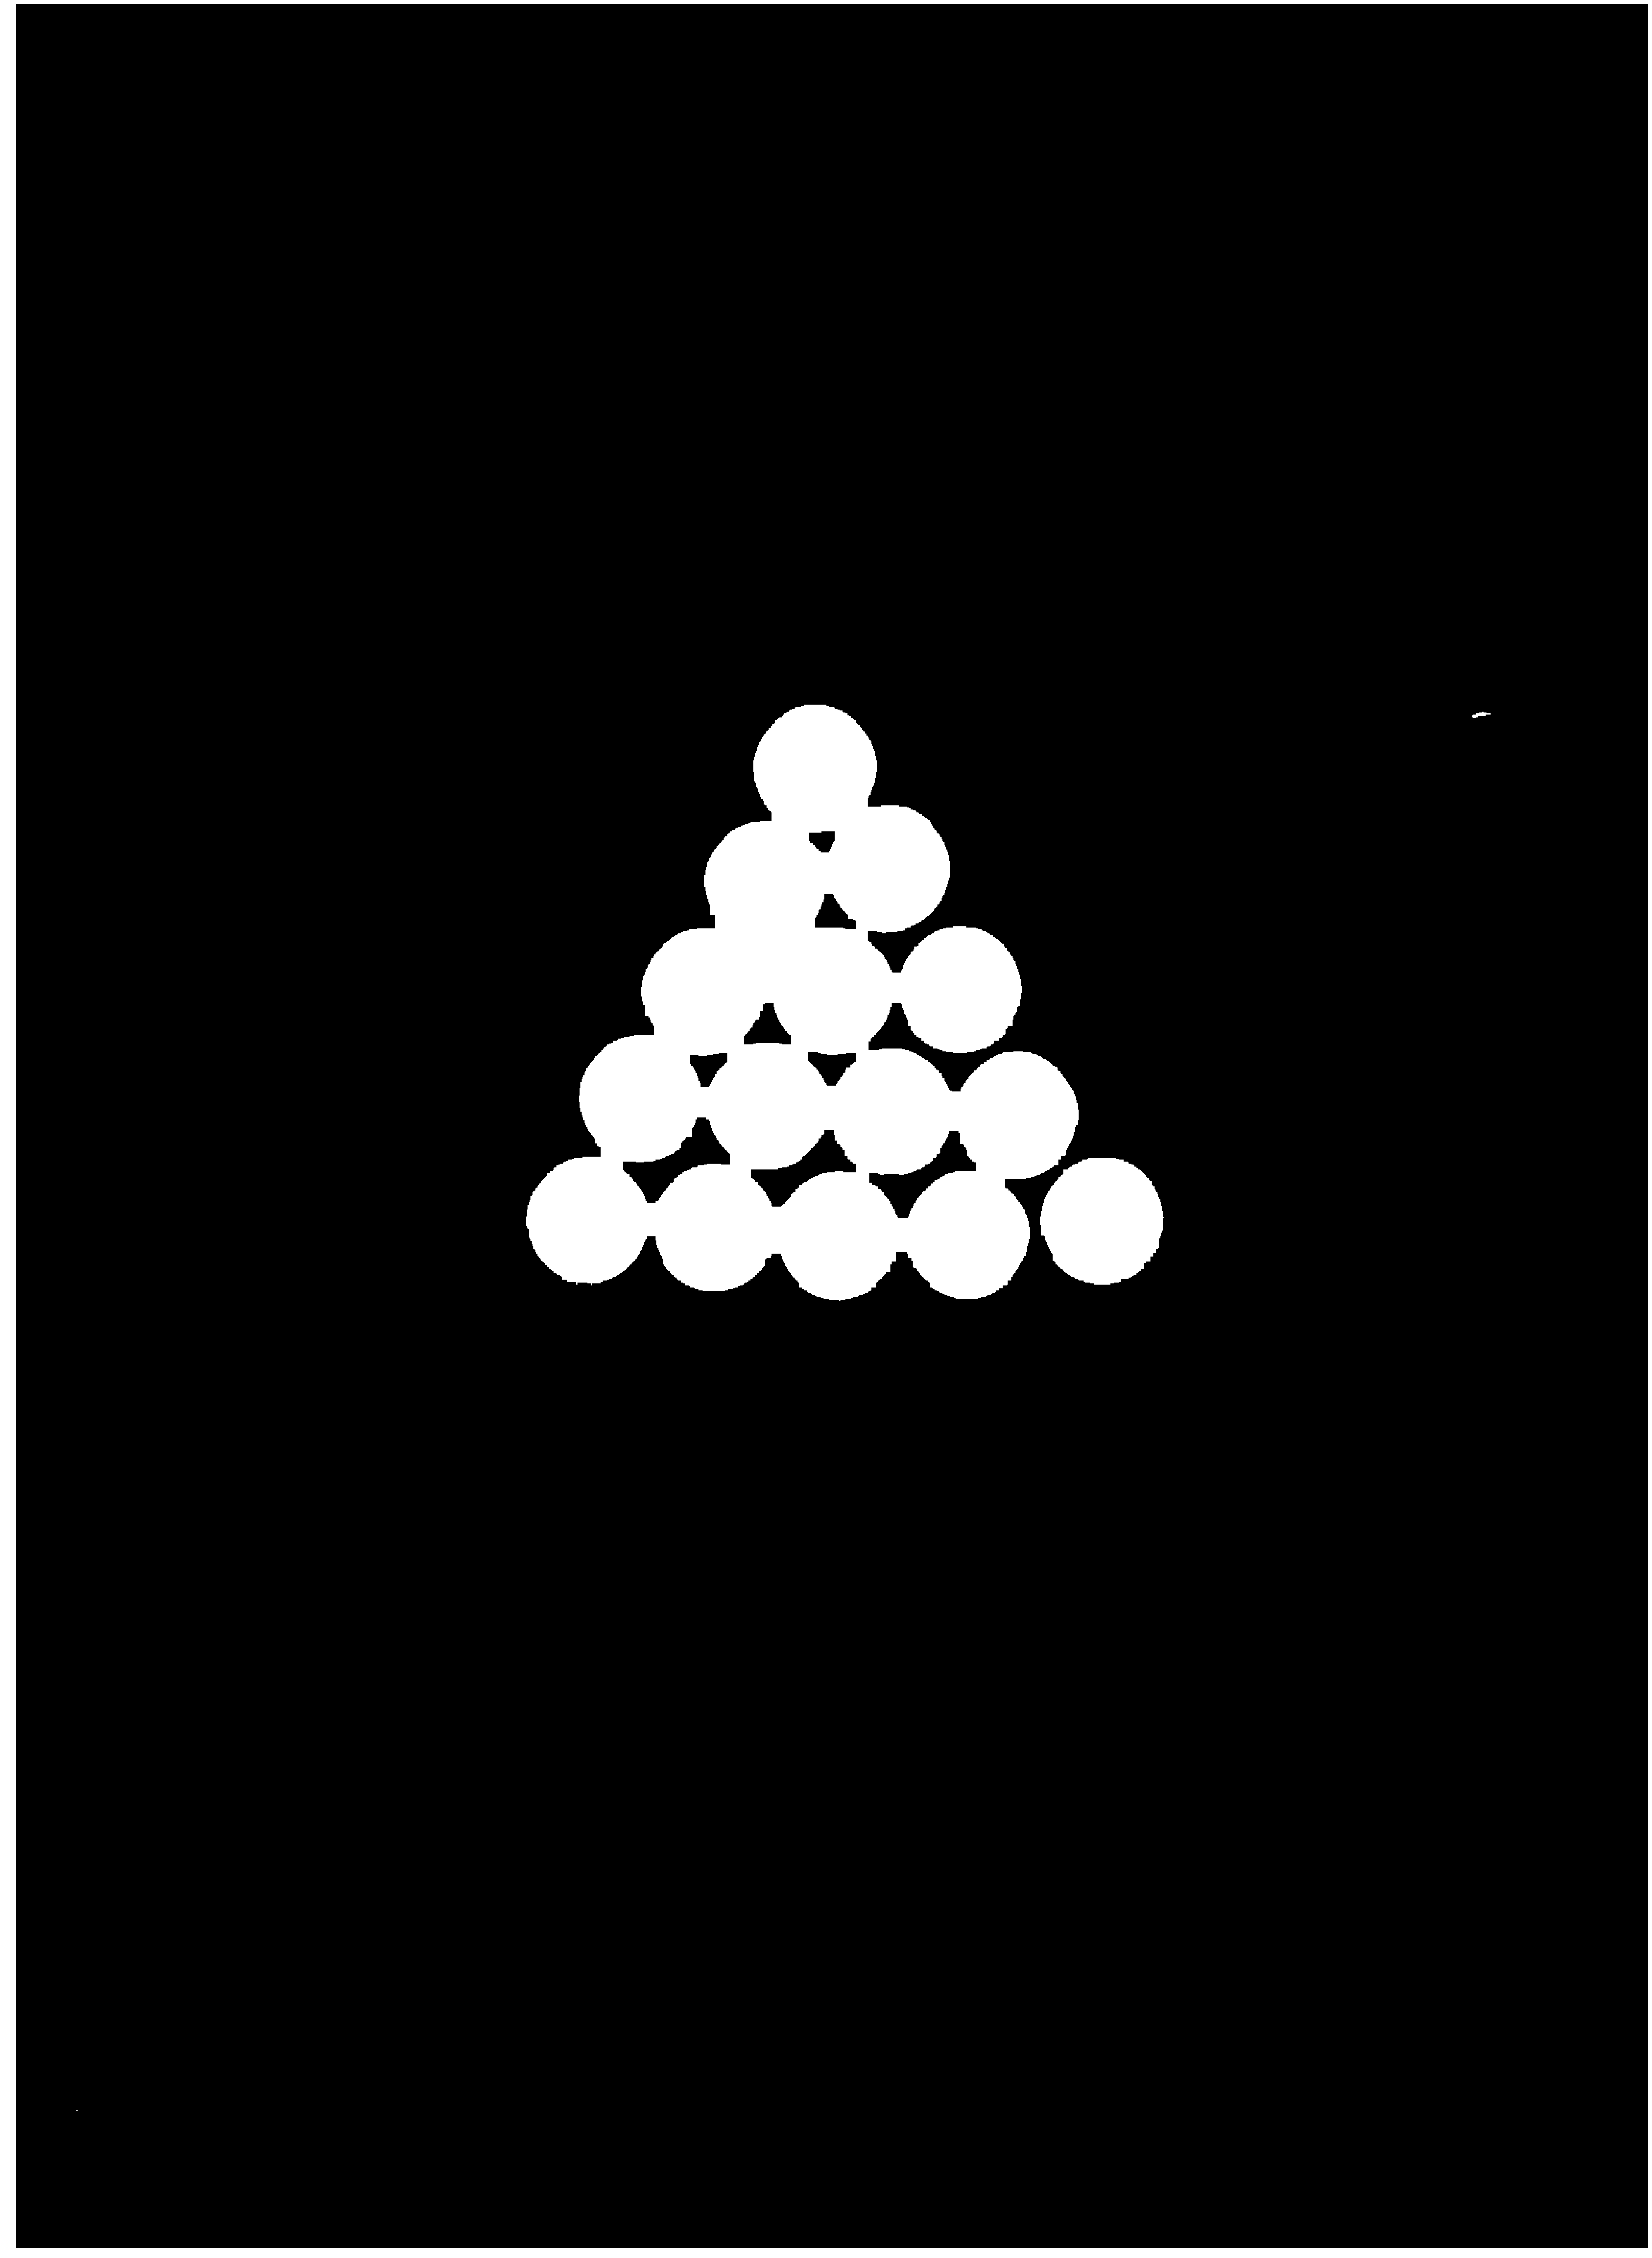

In [10]:
from skimage import morphology
from skimage.morphology import disk
import cv2
from skimage.filters import threshold_li

coin_thresh = threshold_li(byte_image)
print('Selected a threshold of %.2f' %coin_thresh)
coin_mask = byte_image < coin_thresh
showImage(coin_mask)
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(coin_mask)

showImage(fill_coins)


# h, w = image_floodfill.shape[:2]
# mask = np.zeros((h+2, w+2), np.uint8)
 
# cv2.floodFill(image_floodfill, mask, (0,0), 255)
 
# image_floodfill_inv = cv2.bitwise_not(image_floodfill)
 

# im_out = image_floodfill_inv
# showImage(im_out)

element = np.ones((5,5),np.uint8)

fill_coins = cv2.morphologyEx(img_as_ubyte(fill_coins), op=cv2.MORPH_CLOSE, kernel=element, iterations=2)

coin_mask_clean = morphology.remove_small_objects(fill_coins)
coin_mask_clean = ~morphology.remove_small_objects(~fill_coins)
showImage(coin_mask_clean)

# from scipy import ndimage as ndi

# fill_coins = ndi.binary_fill_holes(coin_mask_clean)

# showImage(fill_coins)


# filled = reconstruction(seed, mask, method='erosion')
# showImage(filled)
# newMask = coin_mask_clean.copy()
# newMask = img_as_ubyte(coin_mask)
# h, w = newMask.shape[:2]
# mask = np.zeros((h+2, w+2), np.uint8)
# cv2.floodFill(newMask, mask, (0,0), 255)
# newMask_inv = cv2.bitwise_not(newMask)
# showImage(newMask_inv)

# byte_image2 = img_as_ubyte(coin_mask_clean)
# showImage(coin_mask_clean)
# closingBin = cv2.morphologyEx(byte_image2, op=cv2.MORPH_CLOSE, kernel=element, iterations=2)
# # # closingBin = cv2.morphologyEx(closingBin, op=cv2.MORPH_CLOSE, kernel=element, iterations=2)


# showImage(closingBin)


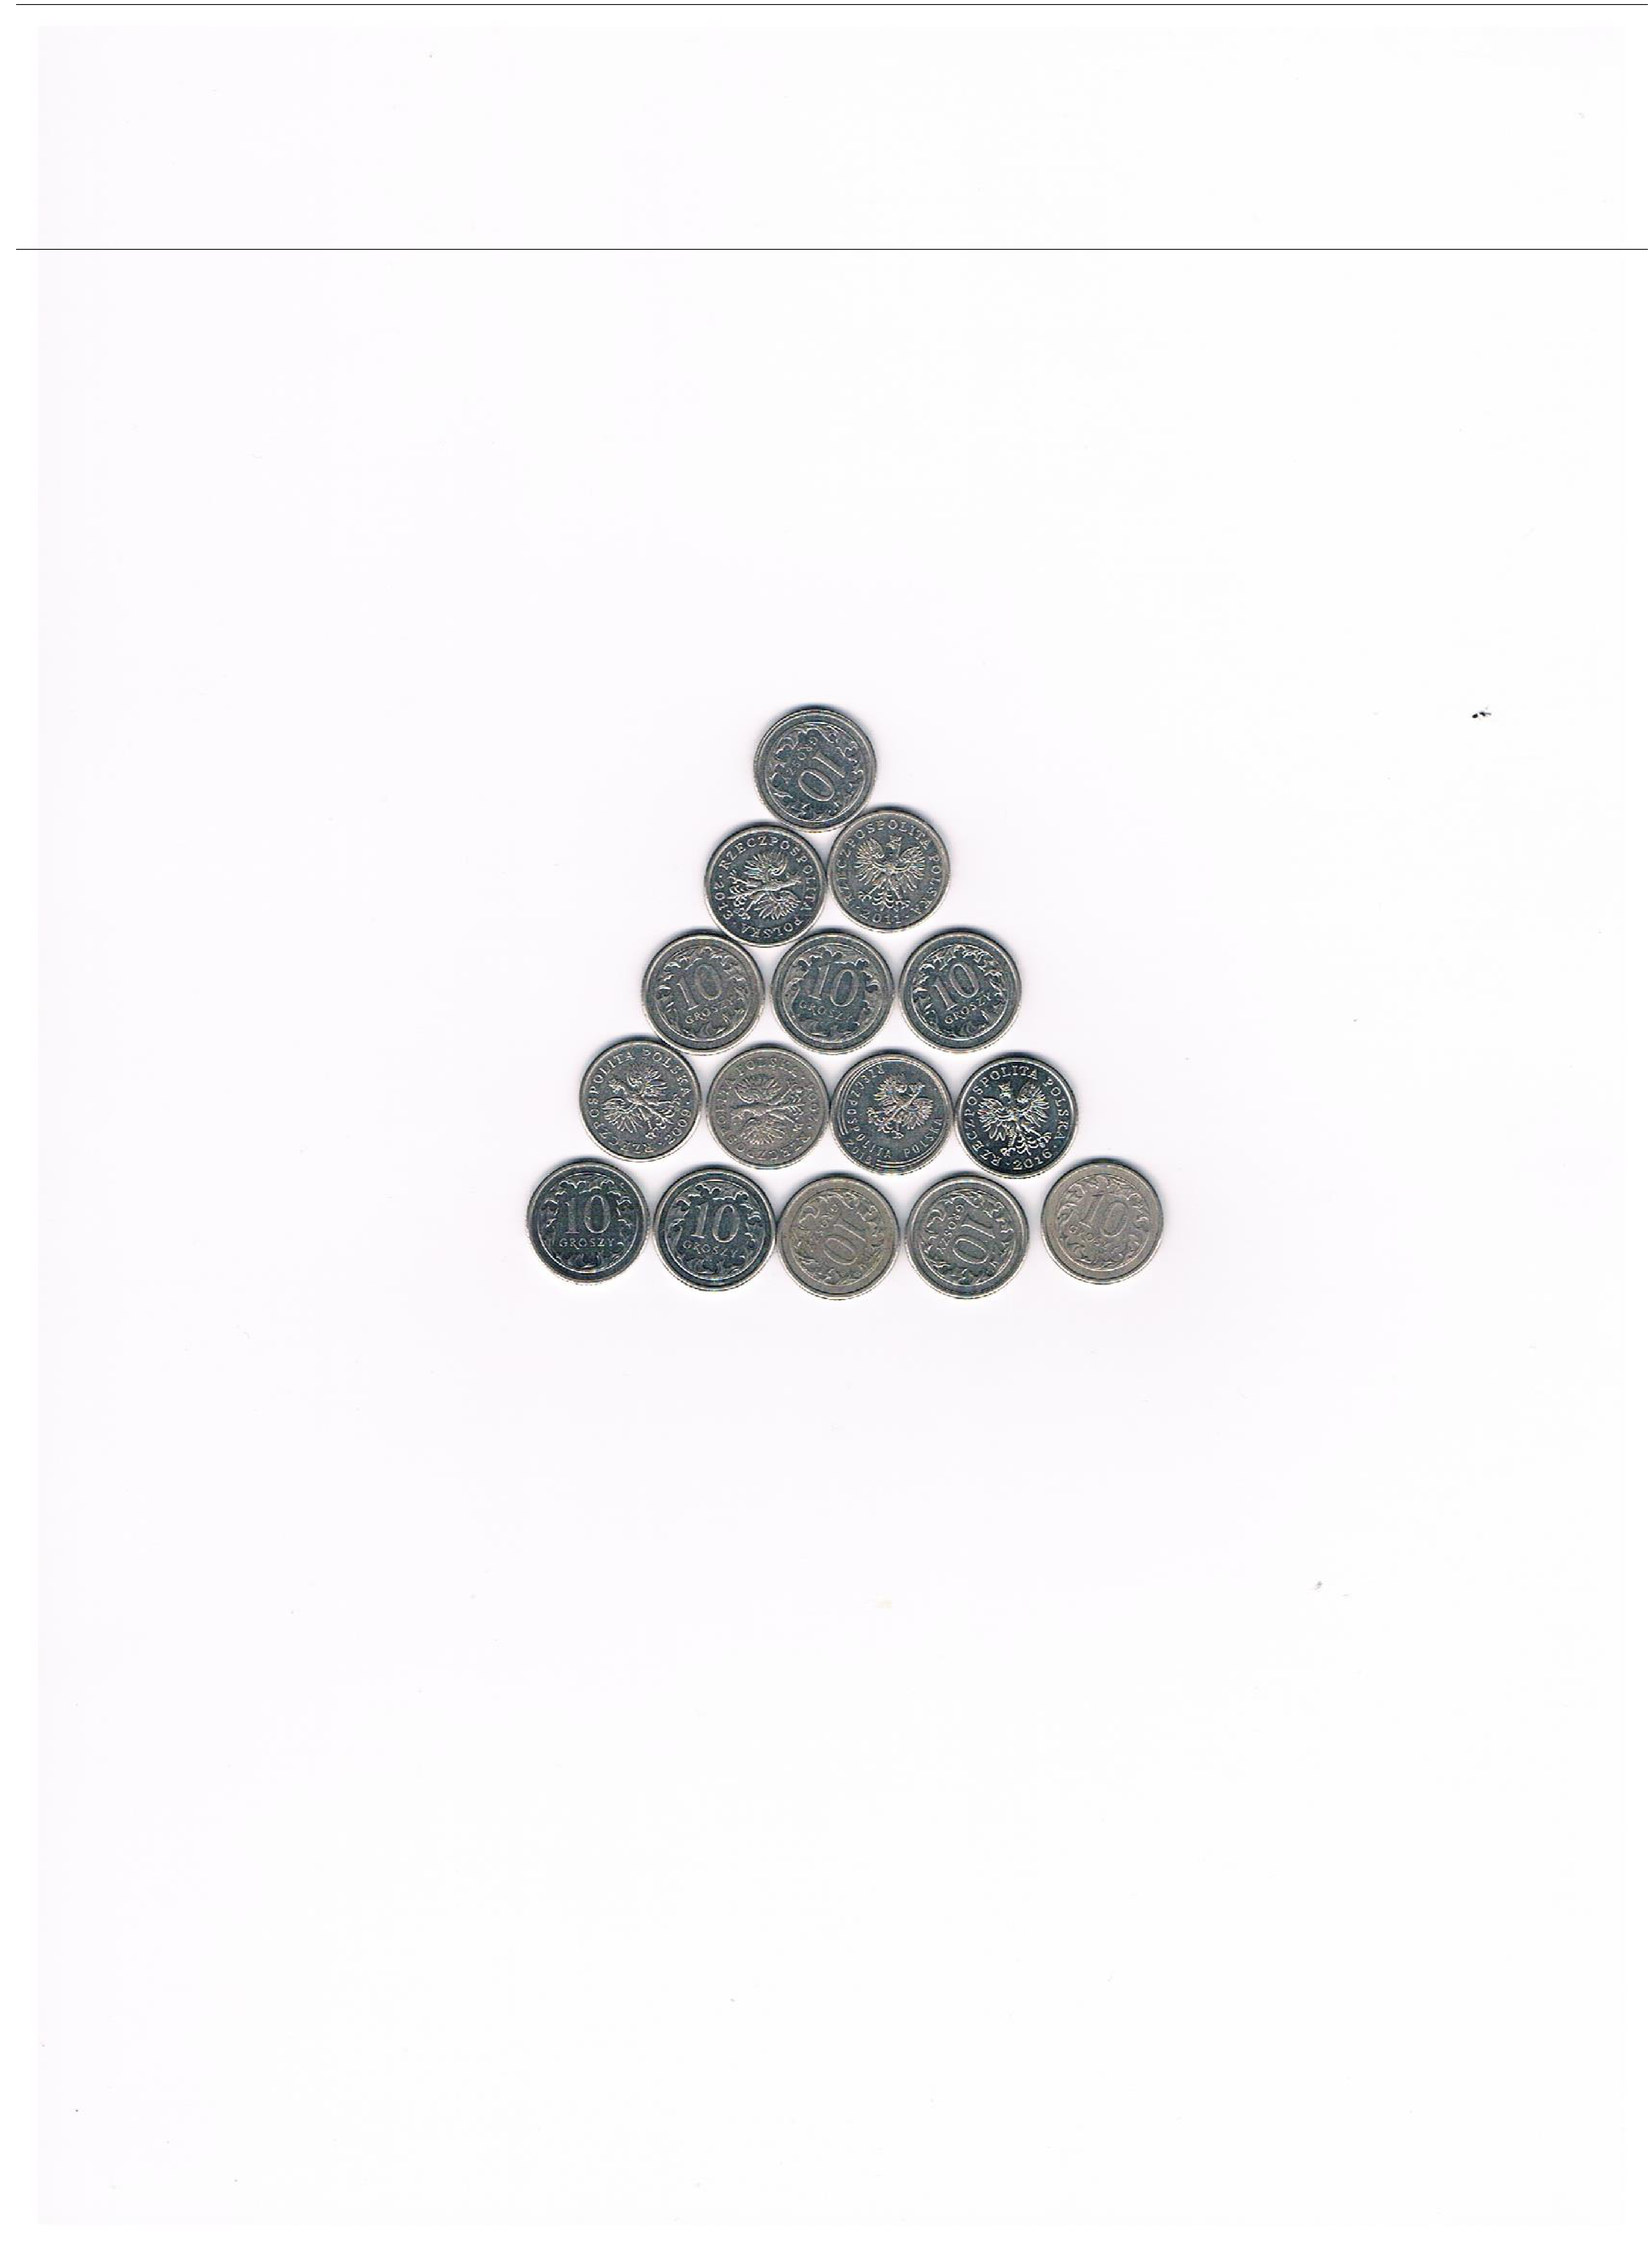

In [11]:
bg_mask = ~coin_mask_clean

image[bg_mask] = 0
fill_coins[bg_mask] = 0
showImage(image)

In [12]:
from scipy import ndimage as ndi
from skimage import measure
import numpy as np


def watershed(mask):
    distance_im = ndi.distance_transform_edt(mask)
    peaks = feature.peak_local_max(distance_im, indices=True)
    peaks_im = np.zeros(distance_im.shape, dtype=bool)
    for row, col in peaks:
        peaks_im[row, col] = 1
    markers_im = measure.label(peaks_im)
    labelled_im = morphology.watershed(-distance_im, markers_im, mask=coin_mask_clean)
    return labelled_im

labelled_coin_image = watershed(coin_mask_clean)
# print('There are %i coins in the image.' %9)
print('There are %i coins in the image.' %(len(np.unique(labelled_coin_image))-1))

showImage(labelled_coin_image)


NameError: name 'feature' is not defined